In [2]:
from IPython.display import Image
import pandas as pd
import numpy as np
# import the LogisticRegression class from scikit-learn
from sklearn.model_selection import train_test_split

# import train_test_split from from scikit-learn
from sklearn.linear_model import LinearRegression

# import metrics from from scikit-learn
from sklearn import metrics

import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)}) #Set our seaborn aesthetics (we're going to customize our figure size)

import warnings
warnings.simplefilter("ignore")

test_data = pd.read_csv('Test.csv')
train_data = pd.read_csv('Train.csv')
full_data = pd.concat([test_data, train_data], ignore_index=True)

In [3]:
full_data.isnull().sum().sum()

1013

In [4]:
train_data.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000


In [5]:
#Most Correlated Values
corr_matrix = train_data.corr()
corr_matrix["target"].sort_values(ascending=False)[:10]

target    1.000000
psa_00    0.782472
car_01    0.702831
stv_01    0.664181
lln_01    0.637835
pg_00     0.613346
pw_06     0.470676
dw_01     0.458206
pw_02     0.442441
pw_03     0.440941
Name: target, dtype: float64

<AxesSubplot:>

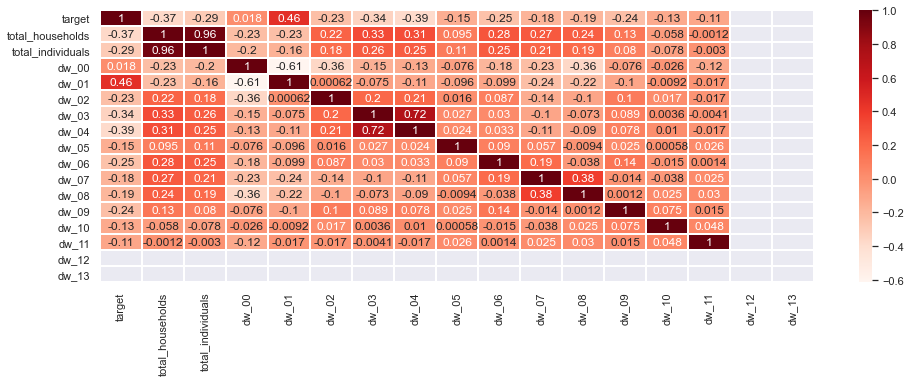

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,5))
sns.heatmap(train_data[['target','ward', 'total_households', 'total_individuals', 'dw_00',
       'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08',
       'dw_09', 'dw_10', 'dw_11', 'dw_12', 'dw_13']].corr(), annot=True, cmap = 'Reds', 
            linewidths=.5)

In [8]:
#dw_01, dw_04, total_households

<AxesSubplot:>

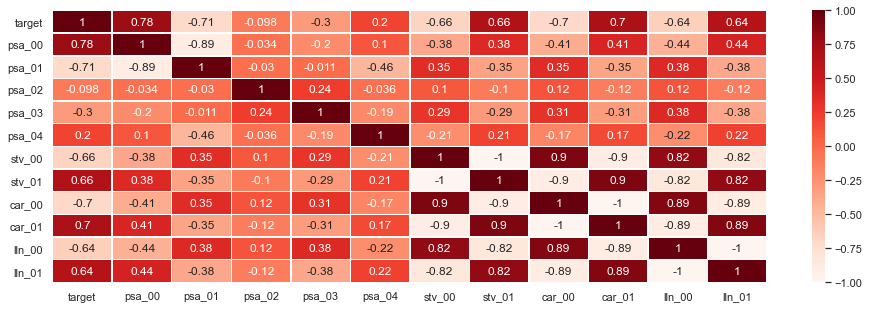

In [9]:
plt.figure(figsize = (16,5))
sns.heatmap(train_data[['target', 'psa_00', 'psa_01',
       'psa_02', 'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00', 'car_01',
       'lln_00', 'lln_01']].corr(), annot=True, cmap = 'Reds', 
            linewidths=.5)

In [10]:
#'psa_00', 'psa_01', 'psa_02', 'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00', 'car_01', 'lln_00', 'lln_01'

<AxesSubplot:>

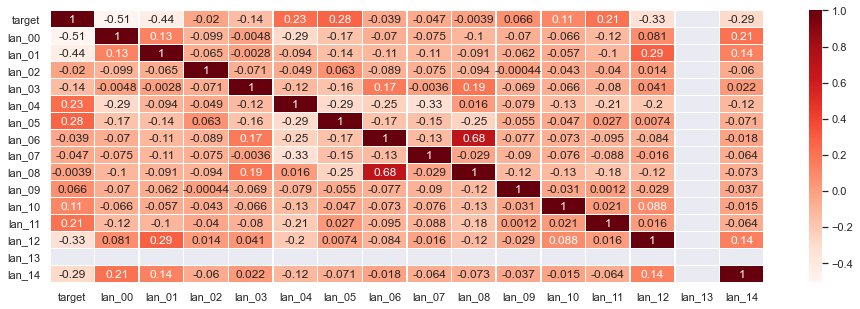

In [11]:
plt.figure(figsize = (16,5))
sns.heatmap(train_data[['target', 'lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04',
       'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11',
       'lan_12', 'lan_13', 'lan_14']].corr(), annot=True, cmap = 'Reds', 
            linewidths=.5)

In [84]:
#lan_00

<AxesSubplot:>

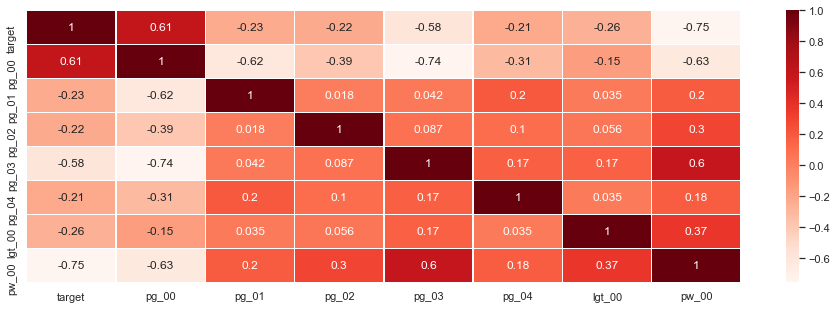

In [85]:
plt.figure(figsize = (16,5))
sns.heatmap(train_data[['target', 'pg_00', 'pg_01', 'pg_02', 'pg_03',
       'pg_04', 'lgt_00', 'pw_00']].corr(), annot=True, cmap = 'Reds', 
            linewidths=.5)

In [86]:
#pw_00, pg_00

<AxesSubplot:>

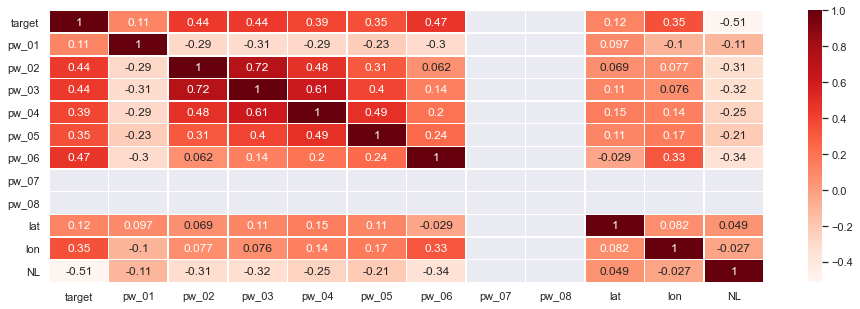

In [87]:
plt.figure(figsize = (16,5))
sns.heatmap(train_data[['target', 'pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05',
       'pw_06', 'pw_07', 'pw_08', 'ADM4_PCODE', 'lat', 'lon', 'NL']].corr(), annot=True, cmap = 'Reds', 
            linewidths=.5)

In [88]:
#NL

In [6]:
from sklearn.model_selection import train_test_split 

In [7]:
X = train_data.drop(['target','ward','ADM4_PCODE'], axis=1)
y = train_data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [9]:
X_test_data = test_data.drop(['ward','ADM4_PCODE'], axis=1)

In [10]:
# get the predictions
predictions_train = model.predict(X_test)
predictions_test = model.predict(X_test_data)

In [12]:
for y, y_pred in list(zip(y_test, predictions_train))[:5]:
    print("Real value: {:.3f} Estimated value: {:.5f}".format(y, y_pred))

Real value: 22.712 Estimated value: 25.03145
Real value: 22.252 Estimated value: 24.33987
Real value: 28.887 Estimated value: 35.26819
Real value: 36.788 Estimated value: 37.08694
Real value: 28.764 Estimated value: 28.32498


In [13]:
X = X_test.reset_index().copy() # make a copy of indices and data
X["predictions"] = predictions_train
X['target'] = y_test.to_list()
X.head()

,index,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,pw_04,pw_05,pw_06,pw_07,pw_08,lat,lon,NL,predictions,target
0,2580,2258.22666,8766.11200,0.489597,0.000734,0.001425,0.001517,0.001847,0.004416,0.007226,...,0.001003,0.000000,0.016157,0,0,-27.660997,25.570566,4.454872,25.031451,22.712275
1,1639,4682.07599,19236.71497,0.896174,0.007129,0.002476,0.000000,0.000000,0.000242,0.082809,...,0.006725,0.001439,0.019026,0,0,-22.967382,30.467881,24.482924,24.339873,22.251973
2,945,2067.85181,11399.70350,0.480606,0.476110,0.015238,0.001622,0.001045,0.000523,0.003395,...,0.019137,0.004081,0.192502,0,0,-27.439573,32.634188,1.393055,35.268189,28.886901
3,955,1663.05714,8917.95073,0.423458,0.560332,0.002661,0.003429,0.002312,0.000751,0.001262,...,0.044438,0.031397,0.006784,0,0,-27.169608,32.298015,0.000000,37.086939,36.787802
4,2294,5028.76910,20404.25411,0.951848,0.034564,0.000681,0.000306,0.000000,0.008254,0.000978,...,0.018999,0.018428,0.073121,0,0,-24.726110,31.201971,9.766828,28.324979,28.764305


In [14]:
X2 = X_test_data.reset_index().copy()
X2["predictions"] = predictions_test

In [15]:
X2

,index,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,lat,lon,NL,predictions
0,0,2504.95194,8745.15151,0.947257,0.000873,0.002021,0.000000,0.000000,0.030116,0.000452,...,0.001757,0.000000,0.000000,0.006649,0.0,0.0,-32.637758,23.848688,0.000000,20.235524
1,1,2080.27718,7258.11764,0.844993,0.000481,0.043629,0.004714,0.012323,0.012300,0.022132,...,0.000691,0.000000,0.000000,0.002916,0.0,0.0,-31.990536,24.555818,0.000000,14.287231
2,2,1106.62639,5919.13170,0.651380,0.007937,0.007113,0.000000,0.001977,0.259711,0.006505,...,0.002253,0.000000,0.000000,0.000000,0.0,0.0,-32.283595,24.563940,8.269556,21.495015
3,3,2175.56096,10280.57452,0.410837,0.002468,0.011511,0.000485,0.000000,0.449604,0.009256,...,0.000000,0.000661,0.000000,0.001379,0.0,0.0,-32.261612,24.542202,8.626625,18.992474
4,4,1270.83883,6018.34202,0.942851,0.002638,0.000821,0.000000,0.000891,0.000787,0.000830,...,0.000000,0.000000,0.000000,0.001660,0.0,0.0,-32.251571,24.558537,8.601754,21.717476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,1008,16076.89903,43296.51372,0.668295,0.002827,0.207749,0.028813,0.069741,0.010701,0.003941,...,0.000392,0.000291,0.000148,0.002277,0.0,0.0,-33.806524,18.496094,33.913055,5.012677
1009,1009,17470.24004,53538.12816,0.483111,0.000824,0.001189,0.000870,0.000554,0.000370,0.001954,...,0.030744,0.008313,0.000348,0.022417,0.0,0.0,-33.982120,18.673308,60.009486,18.532573
1010,1010,9467.25336,40332.11708,0.579036,0.007184,0.066458,0.001003,0.000371,0.150977,0.007699,...,0.003850,0.000990,0.000352,0.010670,0.0,0.0,-34.062704,18.767457,35.834860,13.607667
1011,1011,6111.31195,27793.92916,0.623537,0.002216,0.101188,0.001517,0.000939,0.158979,0.013516,...,0.000559,0.000000,0.000204,0.026741,0.0,0.0,-34.057772,18.487893,50.153301,8.497908


In [16]:
X_full = pd.concat([X, X2], ignore_index=True) # combine X features from train data and test data
X_full

,index,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,pw_04,pw_05,pw_06,pw_07,pw_08,lat,lon,NL,predictions,target
0,2580,2258.22666,8766.11200,0.489597,0.000734,0.001425,0.001517,0.001847,0.004416,0.007226,...,0.001003,0.000000,0.016157,0.0,0.0,-27.660997,25.570566,4.454872,25.031451,22.712275
1,1639,4682.07599,19236.71497,0.896174,0.007129,0.002476,0.000000,0.000000,0.000242,0.082809,...,0.006725,0.001439,0.019026,0.0,0.0,-22.967382,30.467881,24.482924,24.339873,22.251973
2,945,2067.85181,11399.70350,0.480606,0.476110,0.015238,0.001622,0.001045,0.000523,0.003395,...,0.019137,0.004081,0.192502,0.0,0.0,-27.439573,32.634188,1.393055,35.268189,28.886901
3,955,1663.05714,8917.95073,0.423458,0.560332,0.002661,0.003429,0.002312,0.000751,0.001262,...,0.044438,0.031397,0.006784,0.0,0.0,-27.169608,32.298015,0.000000,37.086939,36.787802
4,2294,5028.76910,20404.25411,0.951848,0.034564,0.000681,0.000306,0.000000,0.008254,0.000978,...,0.018999,0.018428,0.073121,0.0,0.0,-24.726110,31.201971,9.766828,28.324979,28.764305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,1008,16076.89903,43296.51372,0.668295,0.002827,0.207749,0.028813,0.069741,0.010701,0.003941,...,0.000291,0.000148,0.002277,0.0,0.0,-33.806524,18.496094,33.913055,5.012677,NaN
1574,1009,17470.24004,53538.12816,0.483111,0.000824,0.001189,0.000870,0.000554,0.000370,0.001954,...,0.008313,0.000348,0.022417,0.0,0.0,-33.982120,18.673308,60.009486,18.532573,NaN
1575,1010,9467.25336,40332.11708,0.579036,0.007184,0.066458,0.001003,0.000371,0.150977,0.007699,...,0.000990,0.000352,0.010670,0.0,0.0,-34.062704,18.767457,35.834860,13.607667,NaN
1576,1011,6111.31195,27793.92916,0.623537,0.002216,0.101188,0.001517,0.000939,0.158979,0.013516,...,0.000000,0.000204,0.026741,0.0,0.0,-34.057772,18.487893,50.153301,8.497908,NaN


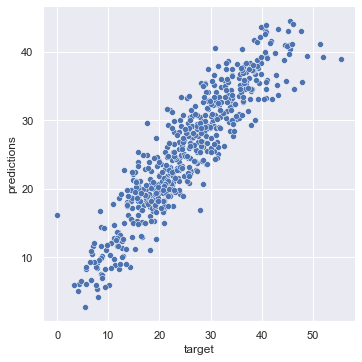

In [34]:
sns.relplot(x="target", y="predictions", data=X, kind="scatter")

In [17]:
mae = metrics.mean_absolute_error(y_test, predictions_train)
mae

2.914186263360601

In [18]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions_train))
rmse

3.84920495443882

In [19]:
model_r2 = metrics.r2_score(y_test, predictions_train)
model_r2

0.8589101970857724

# K-Means Geospacial Clustering Data Preparation

In [20]:
#Normalize numerical data
from sklearn.preprocessing import MinMaxScaler

numerical_data_normalized = MinMaxScaler().fit_transform(numerical_data) # this line scales our data

numerical_data_normalized = pd.DataFrame(              #this pops it back in data frame format 
                    numerical_data_normalized,
                    columns=numerical_data.columns) 

numerical_data_normalized.head()

NameError: name 'numerical_data' is not defined

In [15]:
numerical_data_no_lat_long_normalized = MinMaxScaler().fit_transform(numerical_data_no_lat_long) # this line scales our data

numerical_data_normalized = pd.DataFrame(              #this pops it back in data frame format 
                    numerical_data_no_lat_long,
                    columns=numerical_data_no_lat_long.columns)
numerical_data_no_lat_long.head()

,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,NL
0,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,...,0.742692,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,0,0,0.292039
1,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,...,0.309294,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,0,0,3.207775
2,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,...,0.323393,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,0,0,0.000000
3,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,...,0.677437,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,0,0,2.038778
4,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,...,0.771106,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,0,0,0.000000


# Determining K

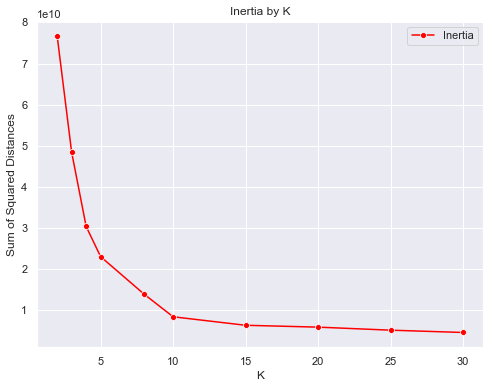

In [18]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import seaborn as sns

range_k = [2, 3, 4, 5, 8, 10, 15, 20, 25, 30]
results_k = {}
for k in range_k:
    km = MiniBatchKMeans(n_clusters=k)
    km.fit_predict(numerical_data_no_lat_long)
    results_k[k] = km.inertia_

#ssd = []
#for i in range(2, 26):
    #km = MiniBatchKMeans(n_clusters=i)
    #km.fit_predict(numerical_data_no_lat_long)
    #ssd.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(
    [c[0] for c in results_k.items()],
    [c[1] for c in results_k.items()], label="Inertia", color="red", marker='o')
ax.set_xlabel("K")
ax.set_ylabel("Sum of Squared Distances")
ax.set_title("Inertia by K")
ax.legend()

In [30]:
! pip install geopandas

     |████████████████████████████████| 994 kB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 7.6 MB 19.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 19.2 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 9.6 MB/s eta 0:00:01    |██████████▉                     | 6.6 MB 9.6 MB/s eta 0:00:02


<AxesSubplot:>

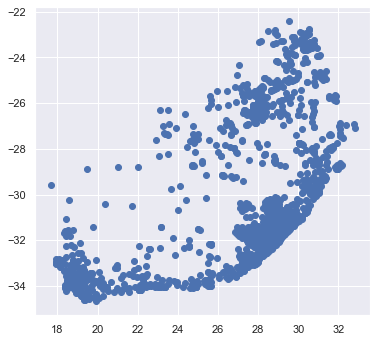

In [110]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Convert it to a GeoDataFrame by transforming the Latitude/Longitude coordinates 
loc_crs = {'init': 'epsg:4326'}
loc_geom = [Point(xy) for xy in zip(X_full['lon'], X_full['lat'])]
geo_df = gpd.GeoDataFrame(X_full, crs=loc_crs, geometry=loc_geom)

# Plot the GeoDataFrame
geo_df.plot()

<AxesSubplot:xlabel='lon', ylabel='lat'>

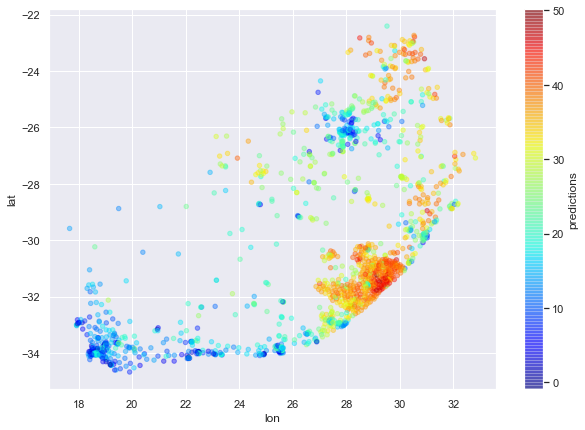

In [111]:
X_full.plot(kind="scatter", x="lon", y="lat", alpha=0.4, figsize=(10,7),
    c="predictions", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

<AxesSubplot:xlabel='lon', ylabel='lat'>

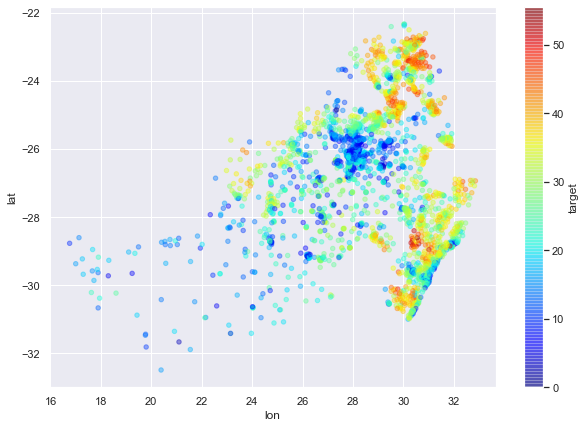

In [112]:
train_data.plot(kind="scatter", x="lon", y="lat", alpha=0.4, figsize=(10,7),
    c="target", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)